In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [40]:
ls

__notebook_source__.ipynb  my_model_weights.npy


In [41]:
import csv
from matplotlib import pyplot as plt
import numpy as np

reshape_size = (48,48)
def GetData(filename):
    X = []
    Y = []
    with open(filename) as csv_file:
        f = 0
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if f == 0 :
                print(row)
                f = 1
            elif f == 1:
                pixels = np.fromstring(row[1], dtype=int, sep=' ')
                pixels = pixels.reshape( reshape_size )
                emotion = int(row[0])

                X.append(pixels)
                Y.append(emotion)
    return [X,Y]

In [42]:
[train_X, train_Y] = GetData('../input/train.csv')
train_X = np.array(train_X)
train_Y = np.array(train_Y)

print('Train data shape:',train_X.shape, train_Y.shape)

['emotion', 'pixels']
Train data shape: (28709, 48, 48) (28709,)


In [43]:
[validation_X, validation_Y] = GetData('../input/val.csv')
validation_X = np.array(validation_X)
validation_Y = np.array(validation_Y)

print('Validation data shape:',validation_X.shape, validation_Y.shape)

['emotion', 'pixels']
Validation data shape: (3589, 48, 48) (3589,)


In [44]:
[test_X, test_Y] = GetData('../input/test.csv')
test_X = np.array(test_X)
test_Y = np.array(test_Y)

print('Test data shape:',test_X.shape, test_Y.shape)

['emotion', 'pixels']
Test data shape: (3589, 48, 48) (3589,)


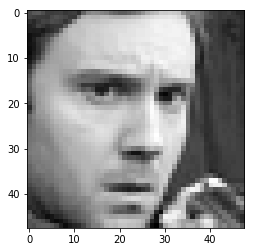

In [45]:

plt.figure(0)
plt.imshow(train_X[0], cmap = 'gray')
plt.show()

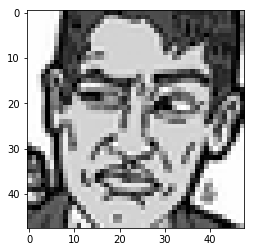

In [46]:
plt.figure(1)
plt.imshow(validation_X[0], cmap = 'gray')
plt.show()

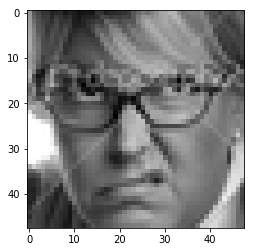

In [47]:
plt.figure(2)
plt.imshow(test_X[0], cmap = 'gray')
plt.show()

In [48]:
def ChangeTo4D(data):
    ip_shape = data.shape
    
    #ip_shape = (1,)+ip_shape
    #ip_shape = (ip_shape[0],1,ip_shape[1],ip_shape[2])
    ip_shape = ip_shape +(1,)
    return data.reshape(ip_shape)

In [49]:
train_X_4d = ChangeTo4D(train_X)
validation_X_4d = ChangeTo4D(validation_X)
test_X_4d = ChangeTo4D(test_X)

In [50]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [51]:
test_Y_one_hot_encoding = keras.utils.to_categorical(test_Y);
train_Y_one_hot_encoding = keras.utils.to_categorical(train_Y);
validation_Y_one_hot_encoding = keras.utils.to_categorical(validation_Y);

In [52]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

#datagen.fit(train_X_4d)

In [53]:
    
import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.models import model_from_json

In [54]:
num_features = 64
num_labels = 7
batch_size = 256
epochs = 15
width, height = 48, 48

#desinging the CNN
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_15 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_16 (Batc (None, 23, 23, 128)       512       
__________

In [55]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [56]:
train_X_4d = train_X_4d/255
validation_X_4d = validation_X_4d/255
test_X_4d=test_X_4d/255

model.fit(train_X_4d, train_Y_one_hot_encoding,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=( validation_X_4d, validation_Y_one_hot_encoding ),
          shuffle=True)

Train on 28709 samples, validate on 3589 samples
Epoch 1/15
28709/28709 [==============================] - 16s 567us/step - loss: 2.0682 - acc: 0.2046 - val_loss: 1.8389 - val_acc: 0.2494
Epoch 2/15
28709/28709 [==============================] - 13s 448us/step - loss: 1.8524 - acc: 0.2317 - val_loss: 1.8214 - val_acc: 0.2494
Epoch 3/15
28709/28709 [==============================] - 13s 448us/step - loss: 1.8295 - acc: 0.2461 - val_loss: 1.8086 - val_acc: 0.2494
Epoch 4/15
28709/28709 [==============================] - 13s 445us/step - loss: 1.8050 - acc: 0.2546 - val_loss: 2.0318 - val_acc: 0.1591
Epoch 5/15
28709/28709 [==============================] - 13s 446us/step - loss: 1.7235 - acc: 0.3001 - val_loss: 1.8612 - val_acc: 0.2725
Epoch 6/15
28709/28709 [==============================] - 13s 445us/step - loss: 1.6312 - acc: 0.3517 - val_loss: 1.6679 - val_acc: 0.3168
Epoch 7/15
28709/28709 [==============================] - 13s 449us/step - loss: 1.5418 - acc: 0.3928 - val_loss: 1.5

In [57]:
test_eval = model.evaluate(test_X_4d, test_Y_one_hot_encoding, verbose =1);
print('test loss and acc is', test_eval[0], test_eval[1]);
print('with batch_size:', batch_size)
print('epochs:',epochs)

3589/3589 [==============================] - 1s 197us/step
test loss and acc is 1.1966216816946005 0.5522429646473138
with batch_size: 128
epochs: 15
